# ***3.1. Statistics in Python***
#### Cameron Divoky 08 JUL 2022 
---

## 3.1.1. *Data representation and interaction*
***

### 3.1.1.1. Data as a table
>The setting that we consider for statistical analysis is that of multiple observations or samples described by a set of different attributes or features. The data can than be seen as a 2D table, or matrix, with columns giving the different attributes of the data, and rows the observations.

In [76]:
import pandas
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


### 3.1.1.2. The pandas data-frame
>We will store and manipulate this data in a pandas.DataFrame, from the pandas module. It is the Python equivalent of the spreadsheet table. It is different from a 2D numpy array as it has named columns, can contain a mixture of different data types by column, and has elaborate selection and pivotal mechanisms.

In [77]:
import numpy as np

t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [78]:
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


### Manipulating Data

In [79]:
# data is a pandas.DataFrame, that resembles R’s dataframe:
data.shape

(40, 8)

In [80]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [81]:
print(data['Gender'])
data[data['Gender'] == 'Female']['VIQ'].mean()

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


109.45

##### *groupby: splitting a dataframe on values of categorical ---variables:*
>Use tab-completion on groupby_gender to find more. Other common grouping functions are median, count (useful for checking to see the amount of missing values in different subsets) or sum. Groupby evaluation is lazy, no work is done until an aggregation function is applied.

In [82]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [83]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [84]:
groupby_gender.count()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,20,20,20,20,20,20,20
Male,20,20,20,20,18,19,20


### *Plotting data using pandas*: these are scatter matrices 
>Pandas comes with some plotting tools (pandas.tools.plotting, using matplotlib behind the scene) to display statistics of the data in dataframes:

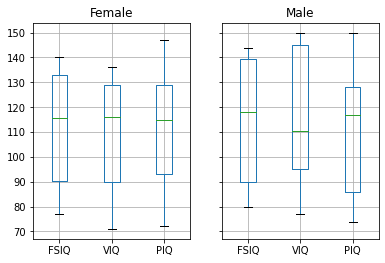

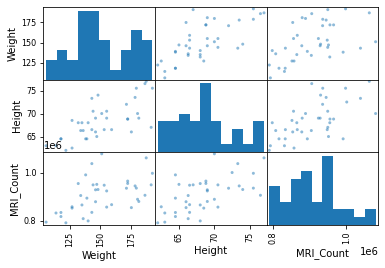

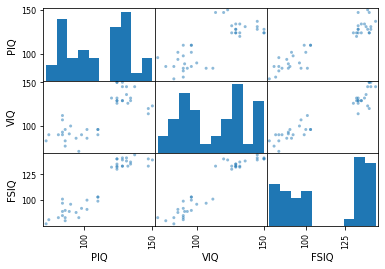

In [85]:
# groupby_gender = data.groupby('Gender') //already did this groupby_gender declaration in cell block 24 so no 
# point in redoing it. Keeping it for future reference.
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])

# Scatter matrices for different columns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

pandas.plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
pandas.plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])
plt.show()

## 3.1.2. Hypothesis testing: comparing two groups
---

In [86]:
from scipy import stats

### 3.1.2.1. Student’s t-test: the simplest statistical test
##### *1-sample t-test: testing the value of a population mean*
>scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value (see the function’s help):

In [87]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

### 2-sample t-test: testing for difference across populations
>We have seen above that the mean VIQ in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind():

In [88]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

### 3.1.2.2. Paired tests: repeated measurements on the same individuals
>PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different. We can use a 2 sample test:

In [89]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

>The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:

In [90]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

This is equivalent to a 1-sample test on the difference:

In [91]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:

In [92]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

## 3.1.3. Linear models, multiple factors, and analysis of variance
---
### 3.1.3.1. “formulas” to specify statistical models in Python

##### A Simple Linear Regression
>Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x. In other terms: <br>
y = x * *coef* + *intercept* + e <br>
where e is observation noise. We will use the statsmodels module to:
Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
Test that coef is non zero.

In [93]:
#import numpy as np

x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

In [94]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [95]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           8.56e-08
Time:                        19:27:55   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

#### Terminology:
>Statsmodels uses a statistical terminology: the y variable in statsmodels is called ‘endogenous’ while the x variable is called exogenous. This is discussed in more detail here.

>To simplify, y (endogenous) is the value you are trying to predict, while x (exogenous) represents the features you are using to make the prediction.

Categorical variables: comparing groups or multiple categories

In [96]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")

In [97]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 07 Jul 2022   Prob (F-statistic):              0.445
Time:                        19:27:55   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [98]:
model = ols('VIQ ~ C(Gender)', data).fit()

In [99]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long) 
model = ols("iq ~ type", data_long).fit()
print(model.summary())

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 07 Jul 2022   Prob (F-statistic):              0.643
Time:                        19:27:55   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  c

### 3.1.3.2. Multiple Regression: including multiple factors

In [100]:
stats.ttest_ind(data['FSIQ'], data['PIQ']) 

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [101]:
data = pandas.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           1.58e-20
Time:                        19:27:55   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

### 3.1.3.3. Post-hoc hypothesis testing: analysis of variance (ANOVA)
>In the above iris example, we wish to test if the petal length is different between versicolor and virginica, after removing the effect of sepal width. This can be formulated as testing the difference between the coefficient associated to versicolor and virginica in the linear model estimated above (it is an Analysis of Variance, ANOVA). For this, we write a **vector of ‘contrast’** on the parameters estimated: we want to test "name[*T.versicolor*] - name[*T.virginica*]", with an F-test:

In [102]:
print(model.f_test([0, 1, -1, 0])) 

<F test: F=3.245335346574177, p=0.07369058781701142, df_denom=146, df_num=1>


In [103]:
print(data)

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


## 3.1.4. More visualization: seaborn for statistical exploration
---
> Followed the example shown on https://scipy-lectures.org/packages/statistics/auto_examples/plot_wage_data.html to figure out how to read this data sheet into a usable format that I could manipulate/read with pandas and seaborn.

In [104]:
# Should technically remove these imports all together since they are done previously but Im keeping them in 
# the cell blocks where they are required for certain modules/functions so I know what packages are needed to 
# perform a task down the road.

#import urllib as urllib
#import os
#import matplotlib.pyplot as plt
#import pandas

# Give names to the columns, Gender in the walkthrough is called SEX in this workflow. 
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

#needed to add the engine='python' parameter to allow the csv to be read in and skip the not table text.
data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None, engine='python')
data.columns = short_names

# Log-transform the wages, because they typically are increased with multiplicative factors
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

### 3.1.4.1. Pairplot: scatter matrices
>We can easily have an intuition on the interactions between continuous variables using seaborn.pairplot() to display a scatter matrix:

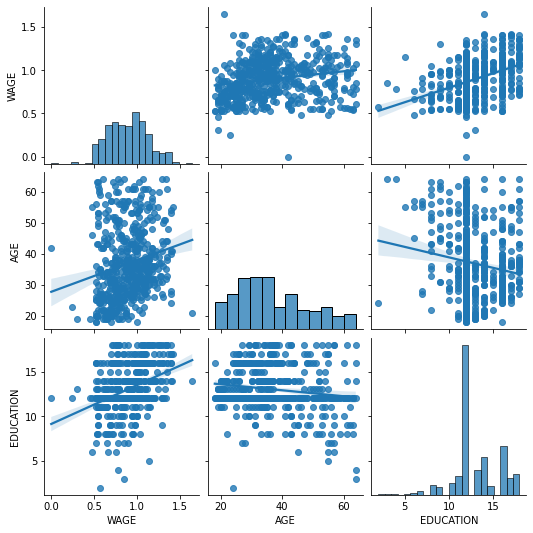

In [105]:
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg')  

##### Categorical variables can be plotted as the hue:

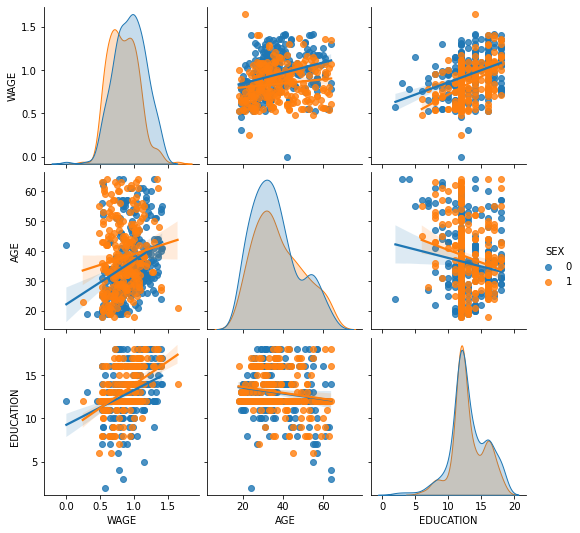

In [106]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX')

##### **Look and feel and matplotlib settings**
Seaborn changes the default of matplotlib figures to achieve a more “modern”, “excel-like” look. It does that upon import. You can reset the default using: <br>
`>>> from matplotlib import pyplot as plt` <br>
`>>> plt.rcdefaults()` <br>
To switch back to seaborn settings, or understand better styling in seaborn, see the relevent section of the seaborn documentation.

### 3.1.4.2. lmplot: plotting a univariate regression

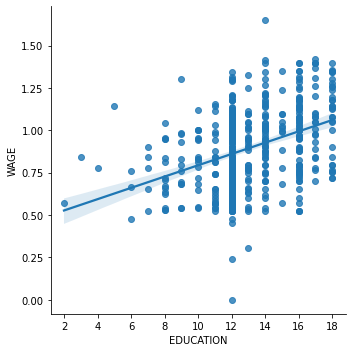

In [107]:
# A regression capturing the relation between one variable and another, eg wage and eduction, 
# can be plotted using seaborn.lmplot():
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)  

##### **Robust regression**

 Given that, in the above plot, there seems to be a couple of data points that are outside of the main cloud to the right, they might be outliers, not representative of the population, but driving the regression. <br>
To compute a regression that is less sentive to outliers, one must use a robust model. This is done in seaborn using `robust=True` in the plotting functions, or in statsmodels by replacing the use of the OLS by a “Robust Linear Model”, **statsmodels.formula.api.rlm()**.

## 3.1.5. Testing for interactions
---

In [108]:
# statistical analysis
import statsmodels.formula.api as sm

result = sm.ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX',
                data=data).fit()    
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           2.94e-25
Time:                        19:28:03   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861